# Classification Trees

### Classification trees as a particular case of [CART](cart.ipynb)

Consider the classification setting, where the output space is
$$
\mathcal{Y} = \{1,\dots,K\},
\qquad
\hat{\mathcal{Y}} = \Delta^{K-1}.
$$

Here, $\Delta^{K-1}$ denotes the probability simplex
$$
\Delta^{K-1}
=
\left\{
p \in \mathbb{R}^K
\;\middle|\;
p_k \ge 0,\;
\sum_{k=1}^K p_k = 1
\right\}.
$$


Predictions therefore take the form of probability distributions over the $K$
classes.

For classification, a standard choice of loss is the cross-entropy loss
$$
\ell(y, q)
=
-\log q_y
=
H\!\left(\delta_y \,\middle\Vert\, q\right),
\qquad q \in \Delta^{K-1},
$$
where $q = (q_1,\dots,q_K)$ is a probability vector, $q_y$ denotes the component
of $q$ corresponding to the true class label $y$, and $\delta_y$ is the Dirac
distribution concentrated at $y$.

Under this loss, the empirical risk of a piecewise-constant predictor $f^{T}$
compatible with a fixed tree structure $T$ is
$$
\begin{aligned}
\mathcal{R}_n(f^{T} \mid T)
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
\sum_{i \in \ell}
-\log \left((f^{T}_\ell)_{y_i}\right) \\
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
\sum_{i \in \ell}
H\!\left(\delta_{y_i} \,\middle\Vert\, f^{T}_\ell\right) \\
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
\sum_{k=1}^K
\sum_{i \in \ell}
\mathbf{1}_{\{y_i = k\}}
\bigl(-\log (f^{T}_\ell)_k\bigr) \\
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
|\ell|
\sum_{k=1}^K
\left(
\frac{1}{|\ell|}
\sum_{i \in \ell}
\mathbf{1}_{\{y_i = k\}}
\right)
\bigl(-\log (f^{T}_\ell)_k\bigr) \\
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
|\ell|\,
H\!\left(
\frac{1}{|\ell|}
\sum_{i \in \ell}
\delta_{y_i}
\;\middle\Vert\;
f^{T}_\ell
\right).
\end{aligned}
$$

Here,
$$
\frac{1}{|\ell|}
\sum_{i \in \ell}
\delta_{y_i}
$$
is the empirical label distribution in leaf $\ell$.

Since cross-entropy is minimized when the two distributions coincide, the
optimal leaf prediction conditional on $T$ is
$$
(f^{T}_\ell)_k
=
\frac{1}{|\ell|}
\sum_{i \in \ell}
\delta_{y_i}(k)
=
\frac{|\ell_k|}{|\ell|},
$$
where $|\ell_k|$ denotes the number of samples in leaf $\ell$ with label $k$.

Substituting this optimal leaf prediction into the empirical risk yields the
optimal value conditional on $T$
$$
\begin{aligned}
\mathcal{R}_n(f^{T}_\ast \mid T)
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
\sum_{i \in \ell}
-\log \left((f^{T}_\ell)_{y_i}\right) \\
&=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
|\ell|\, H(\ell) \\
&=
\mathbb{E}[H(L)].
\end{aligned}
$$
Here, $H(\ell)$ denotes the entropy of the empirical label distribution in leaf
$\ell$, and $L$ is the random variable denoting the leaf reached by a uniformly
randomly sampled training point, so that
$\mathbb{P}(L=\ell)=|\ell|/n$.

It is important to emphasize that the above derivation does not solve the
learning problem. While the optimal prediction at each leaf can be obtained in
closed form for a fixed tree structure $T$, the minimization of the empirical
risk over all possible tree structures remains unsolved.

Indeed, minimizing
$$
\mathcal{R}_n(T)
=
\frac{1}{n}
\sum_{\ell \in \mathrm{leaves}(T)}
|\ell|\, H(\ell)
$$
over the space of all binary, axis-aligned trees is a combinatorial optimization
problem. The number of possible trees grows exponentially with the depth and
with the number of features, rendering exact optimization computationally
infeasible.

### The global optimization problem

Learning an optimal decision tree of bounded depth can be written as:
$$
\min_T \; R_n(T)
\quad \text{subject to} \quad
\mathrm{depth}(T) \le D.
$$

This problem searches over all possible tree structures and split parameters
satisfying the depth constraint.


As a consequence, CART employs a greedy, top-down procedure: at each internal
node, the split is chosen to locally maximize the reduction in empirical risk,
without guaranteeing global optimality. In the classification setting, this is
equivalent to greedily maximizing the decrease in weighted entropy (or a
surrogate such as the Gini index).

## Empirical class probability


For each class $k \in \{1,\dots,K\}$, the empirical class probability at node $t$ is defined as
$$
p_k(t) = \frac{1}{|t|} \sum_{i \in t} \mathbf{1}\{y_i = k\},
$$
that is, the relative frequency of class $k$ among the samples in node $t$.

## Entropy impurity ([Information theory](../../data/Information_theory/02-Entropy.ipynb))

The entropy of node $t$ is
$$
H(t) = -\sum_{k=1}^K p_k(t)\log p_k(t).
$$

## Information gain

### Split information

Denote by $t_L$ and $t_R$ the left and right nodes after the split and the split random variable $S\sim \operatorname{Binomial\left(\frac{|t_R|}{|t|}\right)}$

Then, the entropy after the split is the conditional entropy $H(t|S)$, (see: [conditional entropy](../../data/Information_theory/02-Entropy.ipynb))

$$
\begin{align*}
H(t|S)&=\sum_{s \in \{L,R\}} \mathbb{P}(S=s)\, H(t \mid S=s),\\
&=\mathbb{P}(S=L)\, H(t \mid S=L)+\mathbb{P}(S=R)\, H(t \mid S=R),\\
&=\frac{|t_L|}{|t|}\, H(t \mid S=L)+\frac{|t_R|}{|t|}\, H(t \mid S=R),\\
\end{align*}
$$




### Information Gain

The information gain is therefore 
$$
\begin{align*}
\Delta H(s,t)
&=
H(t)-H(t|S),\\
&=H(t)-
\frac{|t_L|}{|t|} H(t_L)
-
\frac{|t_R|}{|t|} H(t_R).
\end{align*}
$$

Notice htat $\Delta H(s,t)\geq 0$ (see [conditional entropy properties]((../../data/Information_theory/02-Entropy.ipynb))) 

## Gini impurity (statistical view)

The Gini impurity of node $t$ is
$$
G(t) = 1 - \sum_{k=1}^K p_k(t)^2.
$$

### Property: Gini impurity interpretation

Gini impurity equals the probability that two randomly drawn samples from the node have different labels.
$$
G(t)=\mathbb{P}(Y \neq Y').
$$ 

#### Proof:

Let $Y$ and $Y'$ two radom variables $i.i.d.$ sampled from node $t$ with the empirical class probability $\mathbb{P}(t=k)=p_k(t)$. 

$$
\begin{align*}
\mathbb{P}(Y\neq Y')&=\mathbb{P}(\cup_{k=1}^K\{Y=k\}, Y\neq Y'),\\
&=\sum_{k=1}^K\mathbb{P}(Y=k, Y\neq Y'),\\

&=\sum_{k=1}^K\mathbb{P}(Y=k, Y'\neq k),\\
&=\sum_{k=1}^K\mathbb{P}(Y=k) \mathbb{P}(Y'\neq k),\\
&=\sum_{k=1}^K\mathbb{P}(Y=k) (1-\mathbb{P}(Y' = k)),\\
&=\sum_{k=1}^Kp_{k}(t) (1-p_{k}(t)),\\
&=\sum_{k=1}^Kp_{k}(t) - \sum_{k=1}^Kp_{k}(t)^2,\\
&=1-\sum_{k=1}^Kp_{k}(t)^2.
\end{align*}
$$

### Gini Split

Denote by $t_L$ and $t_R$ the left and right nodes after the split and the split random variable $S\sim \operatorname{Binomial\left(\frac{|t_R|}{|t|}\right)}$

The conditional gini impurity of $Y$ given $X$ is defined as the average of the
gini impurity of $Y$ conditioned on each value of $X$:
$$
\begin{aligned}
G(Y \mid X=x)&:= 1-\sum_{y \in \mathcal{Y}}\mathbb{P}(Y=y|X=x)^2,\\
G(Y \mid X)
&:= \sum_{x \in \mathcal{X}} \mathbb{P}(X=x)\, G(Y \mid X=x).
\end{aligned}
$$
where $X$ and $Y$ are finite random variables with alphabets $\mathcal{X}$ and $\mathcal{Y}$.

Similar to the entropy case, if we denote by $t_L$ and $t_R$ the left and right nodes after the split and the split random variable $S\sim \operatorname{Binomial\left(\frac{|t_R|}{|t|}\right)}$

Then, the Gini after the split is the conditional Gini $G(t|S)$, 
$$
\begin{align*}
G(t|S)&=\sum_{s \in \{L,R\}} \mathbb{P}(S=s)\, G(t \mid S=s),\\
&=\mathbb{P}(S=L)\, G(t \mid S=L)+\mathbb{P}(S=R)\, G(t \mid S=R),\\
&=\frac{|t_L|}{|t|}\, G(t \mid S=L)+\frac{|t_R|}{|t|}\, G(t \mid S=R).
\end{align*}
$$


## Split criterion (unified view)

For both entropy and Gini, CART selects splits by maximizing the impurity
reduction
$$
\Delta I(s,t)
=
I(t)
-
\frac{|t_L|}{|t|} I(t_L)
-
\frac{|t_R|}{|t|} I(t_R),
\qquad I \in \{H, G\}.
$$

The algorithm is identical in both cases, only the impurity function differs.
Notice that this criterion selects the split that locally minimizes the impurity
at the current node, without accounting for the effect of future splits. This is
why the algorithm performs a greedy, top-down search.

### Computational hardness

The above optimization problem is NP-hard.
In particular, it has been shown that finding an optimal decision tree of depth
at least $2$ is NP-complete, even for:
- binary classification,
- binary-valued features.

The hardness arises because:
- split choices at different nodes interact combinatorially,
- the number of candidate trees grows exponentially with depth and dimension,
- even shallow trees can encode classical NP-hard problems.

## Bias–variance perspective


- Deep trees: low bias, high variance  
- Shallow trees: higher bias, lower variance  

Regularization (depth limits, pruning) controls variance.

## Why ensembles work (sketch)


Let $f_1,\dots,f_M$ be randomized trees.
Then
$$
\mathrm{Var}\!\left(\frac{1}{M}\sum_{m=1}^M f_m(x)\right)
=
\frac{1}{M^2}\sum_{i,j}\mathrm{Cov}(f_i,f_j).
$$

Random feature selection reduces covariance, yielding variance reduction.

## Summary


- Decision trees perform greedy empirical risk minimization  
- Entropy measures uncertainty reduction  
- Gini measures class disagreement probability  
- Leaf predictions are optimal estimators  
- Overfitting is structural, but ensembles mitigate variance  

## Code

In [37]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as SKDecisionTreeClassifier, export_text 
from cart import DecisionTreeClassifier

## Data visualizaiton

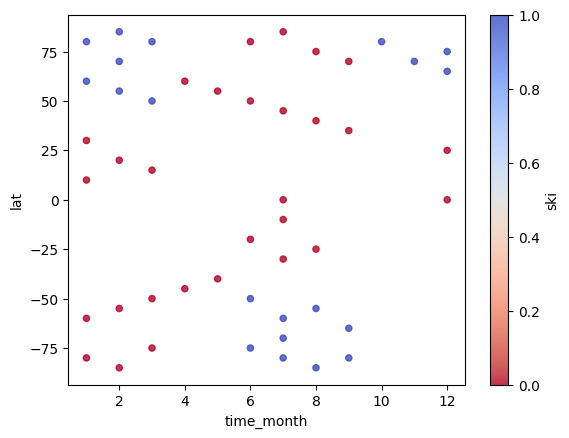

In [38]:
df = pd.read_csv("ski_classification.csv")   
df.plot(x='time_month',y='lat', c='ski', 
    cmap='coolwarm_r',
    alpha=0.8,
    kind='scatter');

## Preoprocesing

In [39]:
y = df.pop('ski').values
train_dicts = df.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(train_dicts)

## Learn (Depth 2)

In [40]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt.fit(X, y);

In [41]:
dt_sk = SKDecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_sk.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [42]:
print("preds:", dt.predict_proba(X)[:5])
print("SK preds  :", dt_sk.predict_proba(X)[:5])
print("Match?    :", np.all(dt.predict_proba(X) == dt_sk.predict_proba(X)))

preds: [[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.63636364 0.36363636]
 [0.         1.        ]]
SK preds  : [[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.63636364 0.36363636]
 [0.         1.        ]]
Match?    : True


In [43]:
print(export_text(dt_sk, feature_names=dv.get_feature_names_out()))

|--- lat <= 47.50
|   |--- lat <= -47.50
|   |   |--- class: 1
|   |--- lat >  -47.50
|   |   |--- class: 0
|--- lat >  47.50
|   |--- time_month <= 3.50
|   |   |--- class: 1
|   |--- time_month >  3.50
|   |   |--- class: 0



In [44]:
def plot_decision_regions(
    dt: DecisionTreeClassifier, # DecisionTreeRegressor
    df: pd.DataFrame,   # input data
    y: np.ndarray,      # regression targets
    title: str = "Decision Regions",
) -> None:
    # Grid for decision regions
    time_min, time_max = df['time_month'].min() - 0.5, df['time_month'].max() + 0.5
    lat_min,  lat_max  = df['lat'].min() - 2, df['lat'].max() + 2

    xx_time, yy_lat = np.meshgrid(
        np.linspace(time_min, time_max, 400),
        np.linspace(lat_min,  lat_max,  400),
    )
    grid = np.c_[yy_lat.ravel(), xx_time.ravel()]
    Z = dt.predict(grid).reshape(xx_time.shape)

    # Decision regions
    plt.contourf(xx_time, yy_lat, Z, alpha=0.3, cmap='coolwarm_r')

    # Data points (x=time, y=lat)
    plt.scatter(
        df['time_month'],
        df['lat'],
        c=y,
        cmap='coolwarm_r',
        edgecolor='k',
        alpha=0.8
    )

    plt.xlabel('time_month')
    plt.ylabel('lat')
    plt.title(title)
    plt.show()

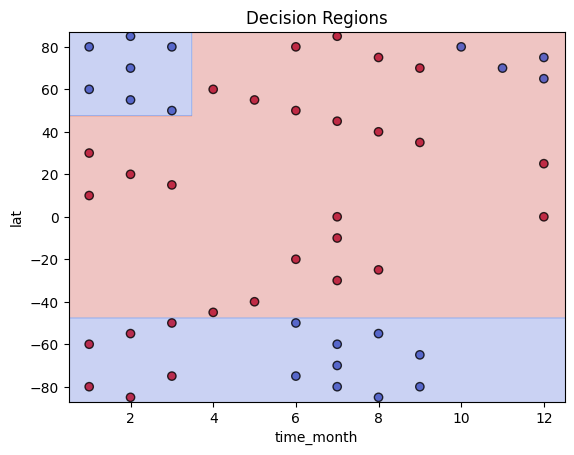

In [45]:
plot_decision_regions(dt, df, y)

## Learn (Depth n)

In [46]:
def leran_plot(depth):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dt.fit(X, y)
    plot_decision_regions(dt, df, y)

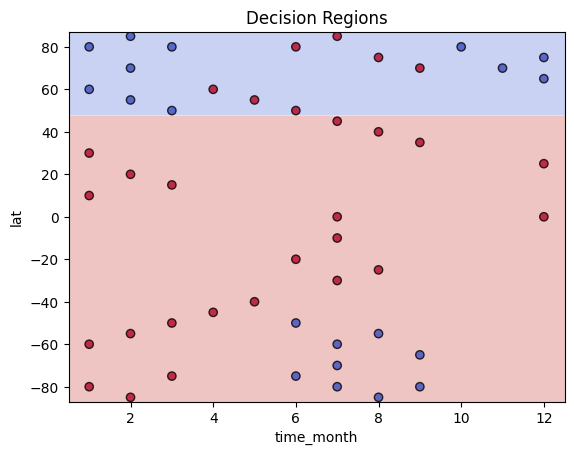

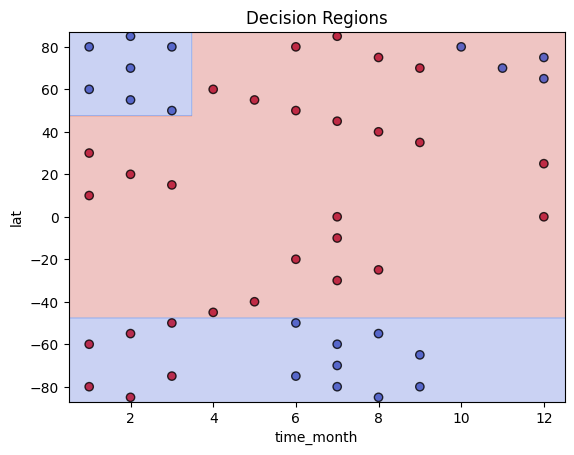

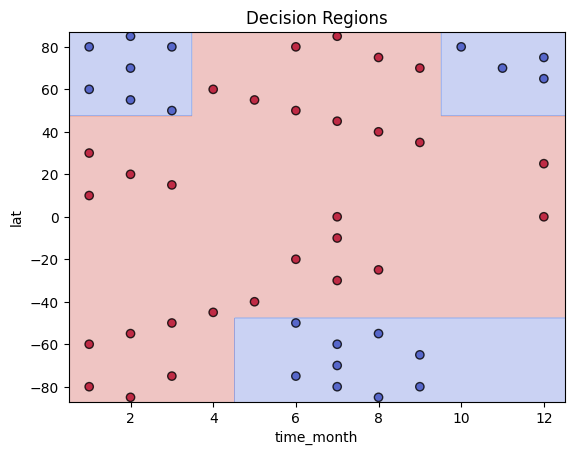

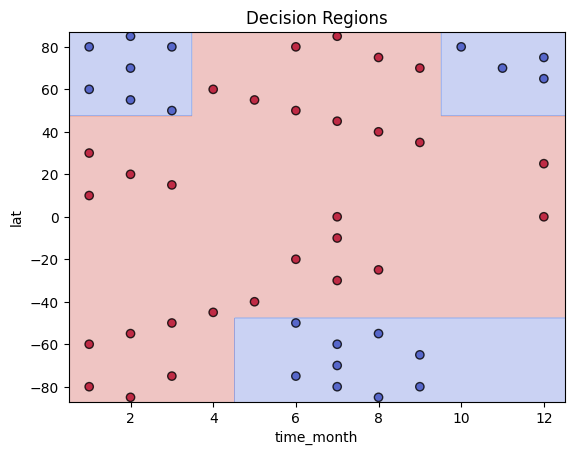

In [47]:
for depth in range(1,5):
    leran_plot(depth)
    